# The purpose of this notebook is to visualise some sample radiographs containing positive observations for the 5 evaluation tasks from the CheXpert dataset

In [48]:
import os

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image 

from tqdm import tqdm

# Load meta-data

In [65]:
meta_data_base_path = os.path.join(os.environ.get('PROJECT_DATA_BASE_DIR'), 'CheXpert-v1.0-small/')
meta_data_train_path = os.path.join(meta_data_base_path, 'train.csv')
meta_data_train = pd.read_csv(meta_data_train_path)
meta_data_train.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


# Only include competition observations

In [66]:
meta_data_train.drop(
        ['No Finding', 'Enlarged Cardiomediastinum', 'Lung Opacity', 'Lung Lesion', 'Pneumonia', 'Pneumothorax', 'Pleural Other', 'Fracture', 'Support Devices'],
        axis=1, inplace=True
)
meta_data_train.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,NaN,NaN,NaN,NaN,NaN
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,-1.0,-1.0,-1.0,-1.0,-1.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,-1.0,NaN,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,-1.0,NaN,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,1.0,NaN,NaN,NaN


# Modify path to point to actual files on machine

In [67]:
path_prefix = os.environ.get('PROJECT_DATA_BASE_DIR') + '/'
meta_data_train['Path'] = path_prefix + meta_data_train['Path'].astype(str)

# Find patients with observations

## Find 2 frontal/lateral scans of people with Atelectasis

In [68]:
meta_data_atelectasis = meta_data_train[
    (meta_data_train['Atelectasis'] == 1.0) & 
    (meta_data_train['Edema'] == 0.0) & 
    (meta_data_train["Cardiomegaly"] == 0.0) & 
    (meta_data_train["Consolidation"] == 0.0) &
    (meta_data_train["Pleural Effusion"] == 0.0)
].head(20)
meta_data_atelectasis

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
20294,/vol/bitbucket/eb1816/individual_project/data/...,Female,71,Frontal,AP,0.0,0.0,0.0,1.0,0.0
36984,/vol/bitbucket/eb1816/individual_project/data/...,Male,50,Frontal,AP,0.0,0.0,0.0,1.0,0.0
48454,/vol/bitbucket/eb1816/individual_project/data/...,Female,73,Frontal,PA,0.0,0.0,0.0,1.0,0.0
48455,/vol/bitbucket/eb1816/individual_project/data/...,Female,73,Lateral,NaN,0.0,0.0,0.0,1.0,0.0
50482,/vol/bitbucket/eb1816/individual_project/data/...,Male,71,Frontal,AP,0.0,0.0,0.0,1.0,0.0
59277,/vol/bitbucket/eb1816/individual_project/data/...,Female,65,Frontal,AP,0.0,0.0,0.0,1.0,0.0
63397,/vol/bitbucket/eb1816/individual_project/data/...,Male,80,Frontal,AP,0.0,0.0,0.0,1.0,0.0
83713,/vol/bitbucket/eb1816/individual_project/data/...,Female,59,Frontal,AP,0.0,0.0,0.0,1.0,0.0
84537,/vol/bitbucket/eb1816/individual_project/data/...,Male,85,Frontal,PA,0.0,0.0,0.0,1.0,0.0
84538,/vol/bitbucket/eb1816/individual_project/data/...,Male,85,Lateral,NaN,0.0,0.0,0.0,1.0,0.0


In [69]:
atelectasis_indices = [2, 3, 16, 17]
meta_data_atelectasis = meta_data_atelectasis.iloc[atelectasis_indices, :]
meta_data_atelectasis

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
48454,/vol/bitbucket/eb1816/individual_project/data/...,Female,73,Frontal,PA,0.0,0.0,0.0,1.0,0.0
48455,/vol/bitbucket/eb1816/individual_project/data/...,Female,73,Lateral,NaN,0.0,0.0,0.0,1.0,0.0
105823,/vol/bitbucket/eb1816/individual_project/data/...,Male,53,Frontal,PA,0.0,0.0,0.0,1.0,0.0
105824,/vol/bitbucket/eb1816/individual_project/data/...,Male,53,Lateral,NaN,0.0,0.0,0.0,1.0,0.0


## Find 2 frontal/lateral scans of people with Edema

In [70]:
meta_data_edema = meta_data_train[
    ((meta_data_train['Atelectasis'] == 0.0) | (meta_data_train['Atelectasis'].isnull())) & 
    (meta_data_train['Edema'] == 1.0) & 
    (meta_data_train["Cardiomegaly"] == 0.0) & 
    (meta_data_train["Consolidation"] == 0.0) &
    (meta_data_train["Pleural Effusion"] == 0.0)
].head(20)
meta_data_edema

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
414,/vol/bitbucket/eb1816/individual_project/data/...,Male,64,Frontal,AP,0.0,1.0,0.0,NaN,0.0
7602,/vol/bitbucket/eb1816/individual_project/data/...,Male,62,Frontal,AP,0.0,1.0,0.0,NaN,0.0
9660,/vol/bitbucket/eb1816/individual_project/data/...,Male,88,Frontal,PA,0.0,1.0,0.0,NaN,0.0
9661,/vol/bitbucket/eb1816/individual_project/data/...,Male,88,Lateral,NaN,0.0,1.0,0.0,NaN,0.0
17619,/vol/bitbucket/eb1816/individual_project/data/...,Female,51,Frontal,PA,0.0,1.0,0.0,NaN,0.0
17620,/vol/bitbucket/eb1816/individual_project/data/...,Female,51,Lateral,NaN,0.0,1.0,0.0,NaN,0.0
21110,/vol/bitbucket/eb1816/individual_project/data/...,Female,86,Frontal,AP,0.0,1.0,0.0,NaN,0.0
36978,/vol/bitbucket/eb1816/individual_project/data/...,Male,50,Frontal,PA,0.0,1.0,0.0,NaN,0.0
36979,/vol/bitbucket/eb1816/individual_project/data/...,Male,50,Lateral,NaN,0.0,1.0,0.0,NaN,0.0
38535,/vol/bitbucket/eb1816/individual_project/data/...,Male,62,Frontal,AP,0.0,1.0,0.0,NaN,0.0


In [71]:
edema_indices = [2, 3, 14, 15]
meta_data_edema = meta_data_edema.iloc[edema_indices, :]
meta_data_edema

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
9660,/vol/bitbucket/eb1816/individual_project/data/...,Male,88,Frontal,PA,0.0,1.0,0.0,NaN,0.0
9661,/vol/bitbucket/eb1816/individual_project/data/...,Male,88,Lateral,NaN,0.0,1.0,0.0,NaN,0.0
82301,/vol/bitbucket/eb1816/individual_project/data/...,Female,29,Frontal,PA,0.0,1.0,0.0,NaN,0.0
82302,/vol/bitbucket/eb1816/individual_project/data/...,Female,29,Lateral,NaN,0.0,1.0,0.0,NaN,0.0


## Find 2 frontal/lateral scans of people with  Cardiomegaly

In [72]:
meta_data_cardiomegaly = meta_data_train[
    ((meta_data_train['Atelectasis'] == 0.0) | (meta_data_train['Atelectasis'].isnull())) & 
    (meta_data_train['Edema'] == 0.0) & 
    (meta_data_train["Cardiomegaly"] == 1.0) & 
    (meta_data_train["Consolidation"] == 0.0) &
    (meta_data_train["Pleural Effusion"] == 0.0)
].head(20)
meta_data_cardiomegaly

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
1521,/vol/bitbucket/eb1816/individual_project/data/...,Male,59,Frontal,AP,1.0,0.0,0.0,NaN,0.0
2029,/vol/bitbucket/eb1816/individual_project/data/...,Female,64,Frontal,PA,1.0,0.0,0.0,NaN,0.0
2030,/vol/bitbucket/eb1816/individual_project/data/...,Female,64,Lateral,NaN,1.0,0.0,0.0,NaN,0.0
2177,/vol/bitbucket/eb1816/individual_project/data/...,Male,56,Frontal,PA,1.0,0.0,0.0,NaN,0.0
2178,/vol/bitbucket/eb1816/individual_project/data/...,Male,56,Lateral,NaN,1.0,0.0,0.0,NaN,0.0
3673,/vol/bitbucket/eb1816/individual_project/data/...,Male,56,Frontal,AP,1.0,0.0,0.0,NaN,0.0
3940,/vol/bitbucket/eb1816/individual_project/data/...,Male,76,Frontal,AP,1.0,0.0,0.0,NaN,0.0
4142,/vol/bitbucket/eb1816/individual_project/data/...,Female,77,Frontal,PA,1.0,0.0,0.0,NaN,0.0
4143,/vol/bitbucket/eb1816/individual_project/data/...,Female,77,Lateral,NaN,1.0,0.0,0.0,NaN,0.0
4144,/vol/bitbucket/eb1816/individual_project/data/...,Female,77,Frontal,AP,1.0,0.0,0.0,NaN,0.0


In [73]:
cardiomegaly_indices = [1, 2, 13, 14]
meta_data_cardiomegaly = meta_data_cardiomegaly.iloc[cardiomegaly_indices, :]
meta_data_cardiomegaly

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
2029,/vol/bitbucket/eb1816/individual_project/data/...,Female,64,Frontal,PA,1.0,0.0,0.0,NaN,0.0
2030,/vol/bitbucket/eb1816/individual_project/data/...,Female,64,Lateral,NaN,1.0,0.0,0.0,NaN,0.0
5466,/vol/bitbucket/eb1816/individual_project/data/...,Male,66,Frontal,PA,1.0,0.0,0.0,NaN,0.0
5467,/vol/bitbucket/eb1816/individual_project/data/...,Male,66,Lateral,NaN,1.0,0.0,0.0,NaN,0.0


## Find 2 frontal/lateral scans of people with 5 people with Consolidation

In [74]:
meta_data_consolidation = meta_data_train[
    ((meta_data_train['Atelectasis'] == 0.0) | (meta_data_train['Atelectasis'].isnull())) & 
    (meta_data_train['Edema'] == 0.0) & 
    (meta_data_train["Cardiomegaly"] == 0.0) & 
    (meta_data_train["Consolidation"] == 1.0) &
    (meta_data_train["Pleural Effusion"] == 0.0)
].head(20)
meta_data_consolidation

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
88381,/vol/bitbucket/eb1816/individual_project/data/...,Female,57,Frontal,PA,0.0,0.0,1.0,NaN,0.0
88382,/vol/bitbucket/eb1816/individual_project/data/...,Female,57,Lateral,NaN,0.0,0.0,1.0,NaN,0.0
105033,/vol/bitbucket/eb1816/individual_project/data/...,Male,66,Frontal,AP,0.0,0.0,1.0,NaN,0.0
138442,/vol/bitbucket/eb1816/individual_project/data/...,Female,51,Frontal,PA,0.0,0.0,1.0,NaN,0.0
138443,/vol/bitbucket/eb1816/individual_project/data/...,Female,51,Lateral,NaN,0.0,0.0,1.0,NaN,0.0


In [75]:
consolidation_indices = [0, 1, 3, 4]
meta_data_consolidation = meta_data_consolidation.iloc[consolidation_indices, :]
meta_data_consolidation

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
88381,/vol/bitbucket/eb1816/individual_project/data/...,Female,57,Frontal,PA,0.0,0.0,1.0,NaN,0.0
88382,/vol/bitbucket/eb1816/individual_project/data/...,Female,57,Lateral,NaN,0.0,0.0,1.0,NaN,0.0
138442,/vol/bitbucket/eb1816/individual_project/data/...,Female,51,Frontal,PA,0.0,0.0,1.0,NaN,0.0
138443,/vol/bitbucket/eb1816/individual_project/data/...,Female,51,Lateral,NaN,0.0,0.0,1.0,NaN,0.0


## Find 2 frontal/lateral scans of people with Pleural Effusion

In [76]:
meta_data_pleural_effusion = meta_data_train[
    ((meta_data_train['Atelectasis'] == 0.0) | (meta_data_train['Atelectasis'].isnull())) & 
    (meta_data_train['Edema'] == 0.0) & 
    (meta_data_train["Cardiomegaly"] == 0.0) & 
    (meta_data_train["Consolidation"] == 0.0) &
    (meta_data_train["Pleural Effusion"] == 1.0)
].head(20)
meta_data_pleural_effusion

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
5704,/vol/bitbucket/eb1816/individual_project/data/...,Male,56,Frontal,PA,0.0,0.0,0.0,NaN,1.0
5705,/vol/bitbucket/eb1816/individual_project/data/...,Male,56,Lateral,NaN,0.0,0.0,0.0,NaN,1.0
74600,/vol/bitbucket/eb1816/individual_project/data/...,Male,59,Frontal,PA,0.0,0.0,0.0,NaN,1.0
74601,/vol/bitbucket/eb1816/individual_project/data/...,Male,59,Lateral,NaN,0.0,0.0,0.0,NaN,1.0
86726,/vol/bitbucket/eb1816/individual_project/data/...,Male,72,Frontal,PA,0.0,0.0,0.0,NaN,1.0
86727,/vol/bitbucket/eb1816/individual_project/data/...,Male,72,Lateral,NaN,0.0,0.0,0.0,NaN,1.0
97475,/vol/bitbucket/eb1816/individual_project/data/...,Male,37,Frontal,PA,0.0,0.0,0.0,NaN,1.0
97476,/vol/bitbucket/eb1816/individual_project/data/...,Male,37,Lateral,NaN,0.0,0.0,0.0,NaN,1.0
100039,/vol/bitbucket/eb1816/individual_project/data/...,Male,60,Frontal,PA,0.0,0.0,0.0,NaN,1.0
100040,/vol/bitbucket/eb1816/individual_project/data/...,Male,60,Lateral,NaN,0.0,0.0,0.0,NaN,1.0


In [77]:
pleural_effusion_indices = [10, 11, 12, 13]
meta_data_pleural_effusion = meta_data_pleural_effusion.iloc[pleural_effusion_indices, :]
meta_data_pleural_effusion

,Path,Sex,Age,Frontal/Lateral,AP/PA,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
133983,/vol/bitbucket/eb1816/individual_project/data/...,Female,50,Frontal,AP,0.0,0.0,0.0,NaN,1.0
133984,/vol/bitbucket/eb1816/individual_project/data/...,Female,50,Lateral,NaN,0.0,0.0,0.0,NaN,1.0
141153,/vol/bitbucket/eb1816/individual_project/data/...,Male,46,Frontal,PA,0.0,0.0,0.0,0.0,1.0
141154,/vol/bitbucket/eb1816/individual_project/data/...,Male,46,Lateral,NaN,0.0,0.0,0.0,0.0,1.0


# Visualise scans

In [78]:
atelectasis_paths = meta_data_atelectasis["Path"].tolist()
edema_paths = meta_data_edema["Path"].tolist()
cardiomegaly_paths = meta_data_cardiomegaly["Path"].tolist()
consolidation_paths = meta_data_consolidation["Path"].tolist()
pleural_effusion_paths = meta_data_pleural_effusion["Path"].tolist()

## Atelectasis

### Patient 1

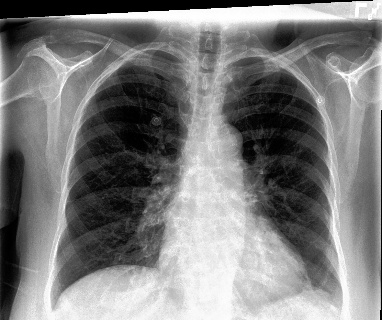

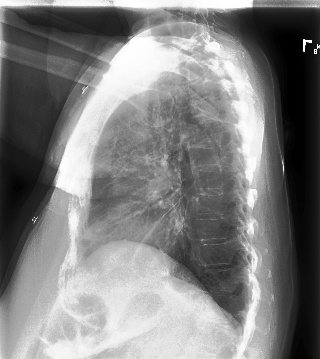

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                            Female
Age                                                                73
Frontal/Lateral                                               Frontal
AP/PA                                                              PA
Cardiomegaly                                                        0
Edema                                                               0
Consolidation                                                       0
Atelectasis                                                         1
Pleural Effusion                                                    0
Name: 48454, dtype: object

In [79]:
for path in atelectasis_paths[:2]:
    pil_img = Image(filename=path)
    display(pil_img)

meta_data_atelectasis.iloc[0, :]

### Patient 2

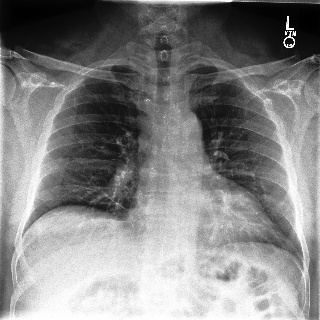

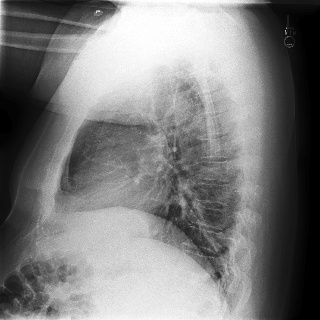

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                              Male
Age                                                                53
Frontal/Lateral                                               Frontal
AP/PA                                                              PA
Cardiomegaly                                                        0
Edema                                                               0
Consolidation                                                       0
Atelectasis                                                         1
Pleural Effusion                                                    0
Name: 105823, dtype: object

In [80]:
for path in atelectasis_paths[2:]:
    pil_img = Image(filename=path)
    display(pil_img)
    
meta_data_atelectasis.iloc[2, :]

## Edema

### Patient 1

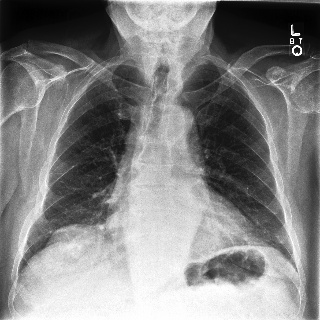

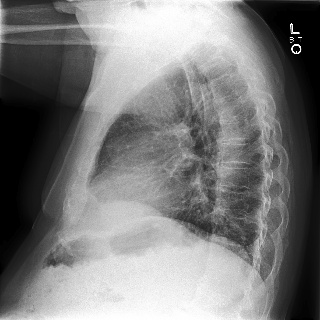

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                              Male
Age                                                                88
Frontal/Lateral                                               Frontal
AP/PA                                                              PA
Cardiomegaly                                                        0
Edema                                                               1
Consolidation                                                       0
Atelectasis                                                       NaN
Pleural Effusion                                                    0
Name: 9660, dtype: object

In [81]:
for path in edema_paths[:2]:
    pil_img = Image(filename=path)
    display(pil_img)

meta_data_edema.iloc[0, :]

### Patient 2

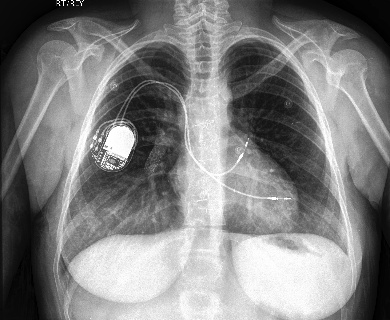

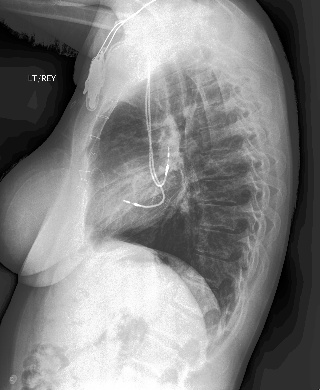

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                            Female
Age                                                                29
Frontal/Lateral                                               Frontal
AP/PA                                                              PA
Cardiomegaly                                                        0
Edema                                                               1
Consolidation                                                       0
Atelectasis                                                       NaN
Pleural Effusion                                                    0
Name: 82301, dtype: object

In [83]:
for path in edema_paths[2:]:
    pil_img = Image(filename=path)
    display(pil_img)

meta_data_edema.iloc[2, :]

## Cardiomegaly

### Patient 1

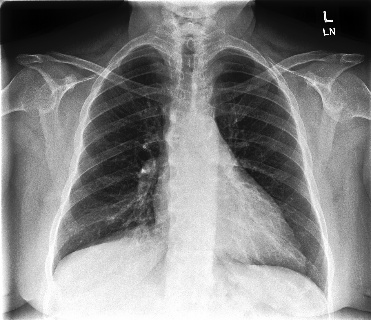

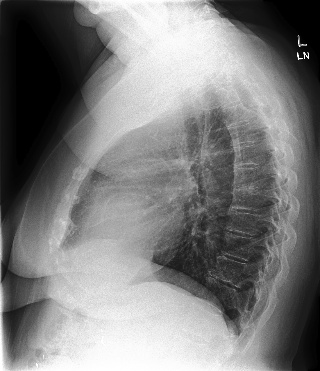

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                            Female
Age                                                                64
Frontal/Lateral                                               Frontal
AP/PA                                                              PA
Cardiomegaly                                                        1
Edema                                                               0
Consolidation                                                       0
Atelectasis                                                       NaN
Pleural Effusion                                                    0
Name: 2029, dtype: object

In [85]:
for path in cardiomegaly_paths[:2]:
    pil_img = Image(filename=path)
    display(pil_img)

meta_data_cardiomegaly.iloc[0, :]

### Patient 2

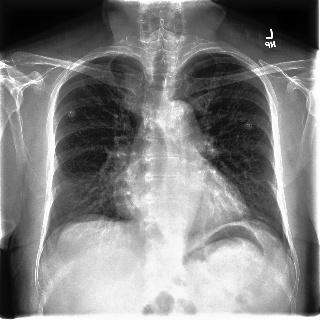

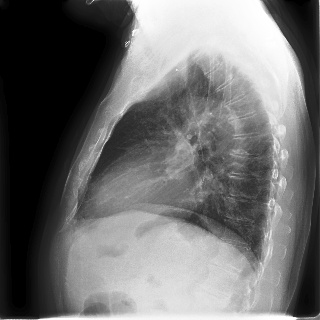

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                              Male
Age                                                                66
Frontal/Lateral                                               Frontal
AP/PA                                                              PA
Cardiomegaly                                                        1
Edema                                                               0
Consolidation                                                       0
Atelectasis                                                       NaN
Pleural Effusion                                                    0
Name: 5466, dtype: object

In [84]:
for path in cardiomegaly_paths[2:]:
    pil_img = Image(filename=path)
    display(pil_img)

meta_data_cardiomegaly.iloc[2, :]

## Consolidation

### Patient 1

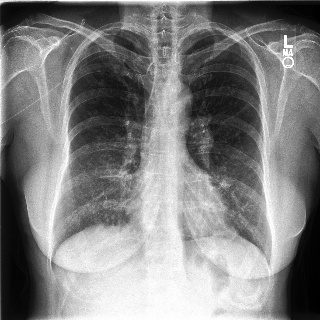

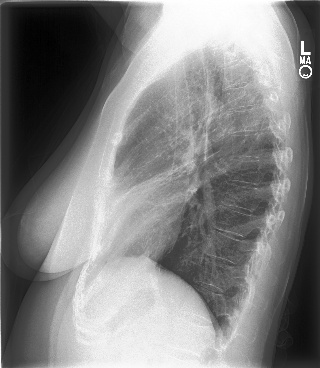

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                            Female
Age                                                                57
Frontal/Lateral                                               Frontal
AP/PA                                                              PA
Cardiomegaly                                                        0
Edema                                                               0
Consolidation                                                       1
Atelectasis                                                       NaN
Pleural Effusion                                                    0
Name: 88381, dtype: object

In [86]:
for path in consolidation_paths[:2]:
    pil_img = Image(filename=path)
    display(pil_img)

meta_data_consolidation.iloc[0, :]

### Patient 2

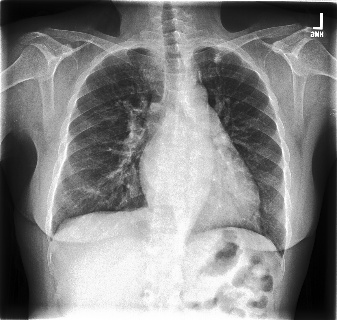

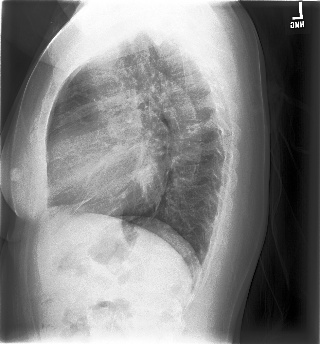

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                            Female
Age                                                                51
Frontal/Lateral                                               Frontal
AP/PA                                                              PA
Cardiomegaly                                                        0
Edema                                                               0
Consolidation                                                       1
Atelectasis                                                       NaN
Pleural Effusion                                                    0
Name: 138442, dtype: object

In [87]:
for path in consolidation_paths[2:]:
    pil_img = Image(filename=path)
    display(pil_img)

meta_data_consolidation.iloc[2, :]

## Pleural Effusion

### Patient 1

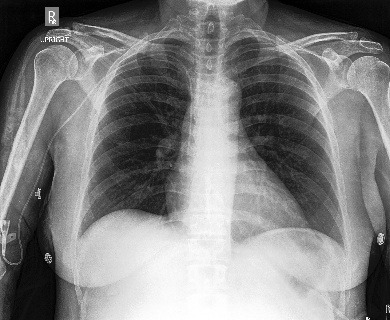

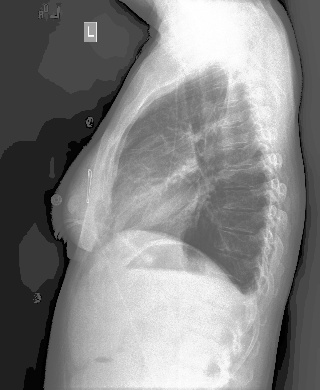

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                            Female
Age                                                                50
Frontal/Lateral                                               Frontal
AP/PA                                                              AP
Cardiomegaly                                                        0
Edema                                                               0
Consolidation                                                       0
Atelectasis                                                       NaN
Pleural Effusion                                                    1
Name: 133983, dtype: object

In [88]:
for path in pleural_effusion_paths[:2]:
    pil_img = Image(filename=path)
    display(pil_img)

meta_data_pleural_effusion.iloc[0, :]

### Patient 2

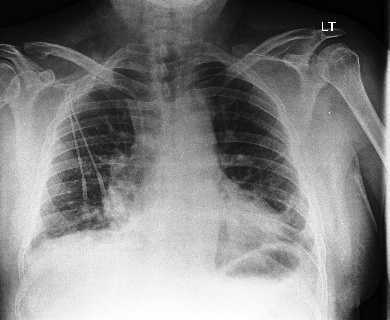

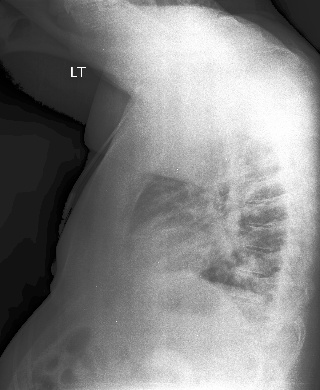

Path                /vol/bitbucket/eb1816/individual_project/data/...
Sex                                                              Male
Age                                                                46
Frontal/Lateral                                               Frontal
AP/PA                                                              PA
Cardiomegaly                                                        0
Edema                                                               0
Consolidation                                                       0
Atelectasis                                                         0
Pleural Effusion                                                    1
Name: 141153, dtype: object

In [90]:
for path in pleural_effusion_paths[2:]:
    pil_img = Image(filename=path)
    display(pil_img)

meta_data_pleural_effusion.iloc[2, :]